In [1]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
#데이터셋 불러오기
df = pd.read_csv('International football results from 1872 to 2023/goalscorers.csv')

In [120]:
#데이터 전처리
df['minute'] = pd.to_numeric(df['minute'], errors='coerce')
df = df.dropna(subset=['minute'])

In [207]:
#선제골 넣은 시간과 팀 구하기
df['first_goal_time'] = df.groupby(['date', 'home_team', 'away_team'])['minute'].transform('min')
df['first_goal_team'] = df.loc[df.groupby(['date', 'home_team', 'away_team'])['minute'].idxmin()]['team']

In [208]:
#승리한 팀 구하기
team_scores = df.groupby(['date', 'home_team', 'away_team', 'team'])['team'].count().reset_index(
    name='scores')

winning_teams = team_scores.loc[
    team_scores.groupby(['date', 'home_team', 'away_team'])['scores'].idxmax()]

df['winning_team'] = np.where(df.set_index(['date', 'home_team', 'away_team', 'team']).index.isin(
    winning_teams.set_index(['date', 'home_team', 'away_team', 'team']).index), df['team'], 'Draw or Lose')

In [209]:
#선제골을 넣은 팀이 승리한 경우의 비율 구하기
win_ratio = len(df[(df['winning_team'] == df['first_goal_team']) & df['first_goal_team'].notna()]) / len(df[df['first_goal_team'].notna()])
draw_or_lose_ratio = 1 - win_ratio
ratios = [win_ratio, draw_or_lose_ratio]

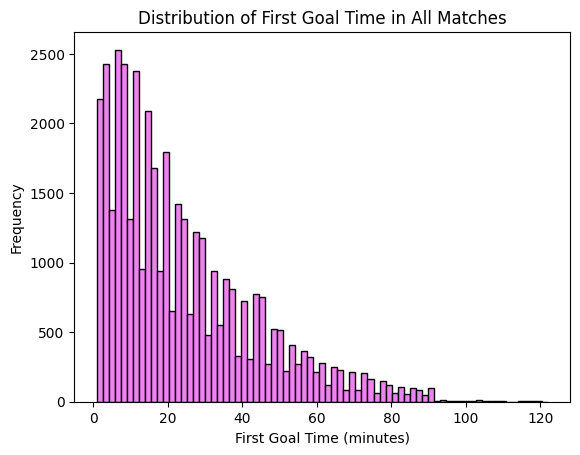

In [210]:
#히스토그램 그리기
plt.hist(df['first_goal_time'].dropna(), bins=75, color='violet', edgecolor='black')
plt.xlabel('First Goal Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of First Goal Time in All Matches')
plt.show()

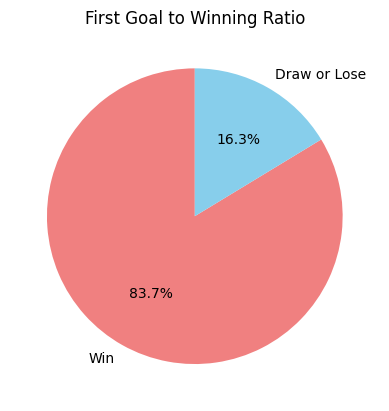

In [211]:
#원 그래프 그리기
labels = ['Win', 'Draw or Lose']
colors = ['lightcoral', 'skyblue']
plt.pie(ratios, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('First Goal to Winning Ratio')
plt.show()